# Curso: Aprendizaje Automático
# Trabajo Práctico 5

Profesor: Luis Alexánder Calvo Valverde

Instituto Tecnológico de Costa Rica

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 18 de Noviembre 2024, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido)

Estudiante:
1. **Agustin Vargas Quesada**


___

## Clustering
___

### Considere lo siguiente:
1. Conjunto de datos: **datos_imagenes_USAR.csv** (Adjunto)
1. Este dataset corresponde a pixeles en imágenes, a partir de las cuales se desea descubrir cuántos grupos (clusters) se podrían encontrar. Se cree que son diferentes emociones de las personas en las imágenes (alegría, enojo, tristeza, etc).
1. Proponga un algoritmo a utilizar (Para su mayor aprendizaje, se recomienda utilizar un algoritmo diferente de kmeans, pero si luego de buscar no se siente segur(a/o) que entendió el algoritmo y sus hyperparpametros, puede utilizar kmeans)
1. Proponga una métrica, la cual debe ser **interna**.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso. Observará que en este caso viene bastante preparado (10 puntos)
    1. Para el algoritmo seleccionado:
        1. Explicación detallada del algoritmo. (10 puntos)
        1. Explicación de la implementación seleccionada y de sus parámetros. (10 puntos)
    1. Explicación del diseño experimental por ejecutar. En este caso recuerde que es aprendizaje NO Supervisado. Además en cuanto al número de clusters, se cree que es mayor que uno y menor que veinte. (5 puntos)
    1. Programación del diseño experimental. (30 puntos)
    1. Muestre en una tabla los resultados de la métrica. (15 puntos)
    1. Grafique las métrica para ver el criterio del codo.(10 puntos)
    1. ¿Cuál es el númermo de cluster que considera mejor describe el conjunto de datos? ¿Cómo defendería su recomendación ante su jefe o quien le contrata? (10 puntos)

## Nota formativa

Las imágenes en archivos digitales se representan mediante una matriz de píxeles, donde cada píxel es un pequeño punto que contiene información sobre el color y la luminosidad.

- Píxeles: Son los elementos más pequeños de una imagen digital. Cada píxel tiene un color que se define mediante valores numéricos.

- Modelos de Color:

  - RGB: Es uno de los modelos más comunes. Cada píxel se representa con tres valores, correspondientes a los colores Rojo, Verde y Azul (Red, Green, Blue). Los valores suelen estar en un rango de 0 a 255, lo que permite representar hasta 16.7 millones de colores.
  - CMYK: Utilizado en impresión, se basa en los colores Cian, Magenta, Amarillo y Negro.
  - Grayscale: Representa imágenes en escala de grises, utilizando un solo valor por píxel que indica la intensidad de la luz.
- Profundidad de Color: Indica cuántos bits se utilizan para representar el color de cada píxel. Por ejemplo, una profundidad de color de 8 bits por canal en RGB permite 256 niveles de rojo, 256 de verde y 256 de azul.

- Resolución: Es la cantidad de píxeles en una imagen, generalmente expresada como la cantidad de píxeles a lo largo del ancho y la altura (por ejemplo, 1920x1080 píxeles).

- Formato de Archivo: Las imágenes digitales se almacenan en varios formatos que pueden comprimir la información para ahorrar espacio o mantener la calidad. Algunos formatos comunes incluyen:

  - JPEG: Compresión con pérdida, útil para fotografías.
  - PNG: Compresión sin pérdida, soporta transparencia.
  - GIF: Soporta animaciones y una paleta limitada de colores.
  - BMP: Formato sin compresión.

Estos elementos permiten la creación, almacenamiento y visualización de imágenes digitales en diversos dispositivos y plataformas.

Algunos detalles adicionales en: https://medium.com/codex/computer-vision-fundamentals-with-opencv-9fc93b61e3e8


In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [40]:
# Cargar el archivo
df = pd.read_csv('datos_imagenes_USAR.csv', delimiter=';')

In [41]:
def calcular_separacion(df, labels):
    if len(set(labels)) <= 1:
        return 0
    
    clusters_unicos = np.unique(labels)
    clusters_unicos = clusters_unicos[clusters_unicos != -1]
    
    if len(clusters_unicos) <= 1:
        return 0
        
    separacion_total = 0
    n_comparaciones = 0
    
    for i in range(len(clusters_unicos)):
        for j in range(i + 1, len(clusters_unicos)):
            puntos_cluster1 = X[labels == clusters_unicos[i]]
            puntos_cluster2 = X[labels == clusters_unicos[j]]
            distancias = cdist(puntos_cluster1, puntos_cluster2)
            separacion_total += np.mean(distancias)
            n_comparaciones += 1
    
    return separacion_total / n_comparaciones if n_comparaciones > 0 else 0

In [58]:
# Lista de valores de eps a probar
eps_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 ,16, 17, 18, 19, 20]

# Almacenar resultados
resultados = []

for eps in eps_values:
    # Crear y ajustar modelo
    dbscan = DBSCAN(eps=eps, min_samples=10)
    clusters = dbscan.fit_predict(datos_scaled)
    
    # Calcular métricas
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)
    separacion = calcular_separacion(df, clusters)
    
    # Guardar resultados
    resultados.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'separacion': separacion,
    })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla de resultados
print("\nTabla de Resultados:")
print(df_resultados)


Tabla de Resultados:
    eps  n_clusters  n_noise   separacion
0     1           1    35875     0.000000
1     2           1    35875     0.000000
2     3           1    35875     0.000000
3     4           2    35865  7838.870396
4     5           2    35865  7838.870396
5     6           2    35864  7822.178782
6     7           2    35864  7822.178782
7     8           2    35864  7822.178782
8     9           2    35863  7796.289509
9    10           2    35863  7796.289509
10   11           3    35852  6163.799213
11   12           3    35850  6157.277142
12   13           3    35850  6157.277142
13   14           5    35827  5401.057058
14   15           5    35810  5375.498114
15   16          10    35736  4831.552816
16   17           9    35629  4090.828666
17   18          11    35493  3953.167103
18   19          12    35319  4034.233916
19   20          10    35122  4250.426162


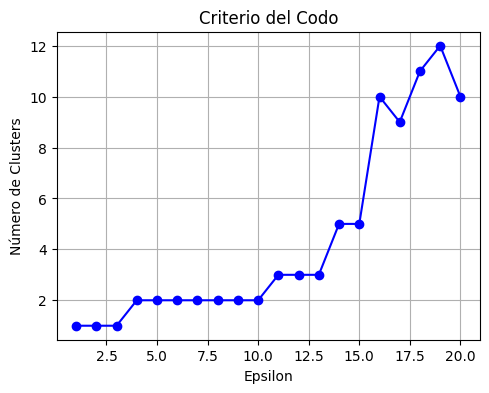

In [57]:
# Graficar criterio del codo
plt.figure(figsize=(12, 4))

# Gráfico del codo
plt.subplot(1, 2, 1)
plt.plot(df_resultados['eps'], df_resultados['n_clusters'], 'bo-')
plt.xlabel('Epsilon')
plt.ylabel('Número de Clusters')
plt.title('Criterio del Codo')
plt.grid(True)

In [ ]:
# Graficar criterio del codo
plt.figure(figsize=(12, 4))

# Gráfico del codo
plt.subplot(1, 2, 1)
plt.plot(df_resultados['eps'], df_resultados['n_clusters'], 'bo-')
plt.xlabel('Epsilon')
plt.ylabel('Número de Clusters')
plt.title('Criterio del Codo')
plt.grid(True)

Para realizar los cluster se utilizo el modelo e DBSCAN, ya que al investigar este modelo no requiere que se le indique la cantidad de clusters que debe de tener si no que el lo que hace es relaizar los cluser por si solo identifando areas de densidad y de esta manera crea los clusters y en los puntos donde no hay densidad este lo clasifica como ruido.
Para este algoritmo se utilizo la metrica interna de separacion, la cual nos esta indicando la distancia entre cada uno de los clusters, esto nos indica que un valor alto los clusters estan muy separado y un valor muy bajo es que estan muy unidos, como podemos ver si es 1 cluster la separacion es 0 porque seria un solo cluster, para este ejemplo se considera que 10 clusters seria lo ideal ya que su separacion no es ni muy alta ni muy baja, es como un punto ideal.
Considerando el grafico de codo podemos observar que los clusters son un poco constantes hasta los 5 cluster y de ahi brincan a 10 donde se considera que es el punto optimo ya que si se siguen aumentando los clusters estos se van empezar a juntar, hay 2 puntos con 10 clusters pero diferentes epsilon que esto es la distancia entre los puntos para ser considerados vecinos, teniendo esto en cuenta un epsilon de 20 no es muy ideal ya que empieza a disminuir la distancia entre cada uno de los clusters haciendo que cada vez esten mas juntos y que no se clasifiquen del todo bien en cambio teniendo un epsilon de 16 tienen mas distancia entre cada uno de los clusters y se pueden diferenciar mejor cada categoria.
Para este modelo no se realizo ningun tipo de preprosecemiento ya que al ser imagenes no requiere que se realice nada.